In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

In [13]:
def cm_to_pixel(cm):
    return cm * 207.2386


def pixel_to_cm(pix):
    return pix / 207.2386

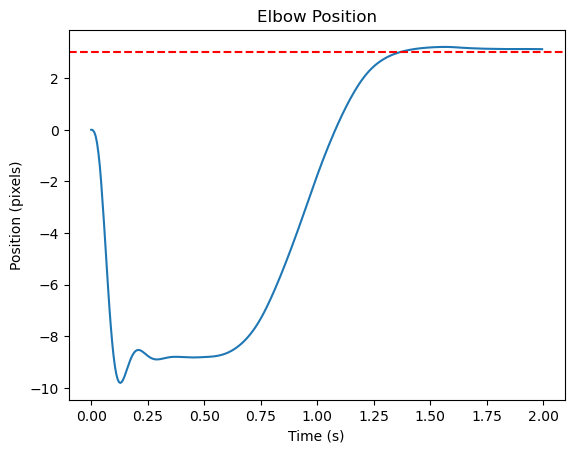

In [19]:
trial = 21
file_path = f'../data/P99/participant_99_position_{trial}.csv'
data = pd.read_csv(file_path)

# Create filter
fs = 500
cutoff = 20.0
nyquist = 0.5 * fs
normal_cutoff = cutoff/nyquist
order = 4
b, a = butter(order, normal_cutoff, btype='low', analog=False)

filtered_data = lfilter(b, a, data['elbow_pos'])

plt.figure()
plt.plot(data['time'], pixel_to_cm(filtered_data))
plt.title("Elbow Position")
plt.xlabel("Time (s)")
plt.ylabel("Position (pixels)")
plt.axhline(3, color='red', linestyle='--')